# Name : Shruti Patkar

# Load Modules and Dataset

In [1]:
#Import required modules
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
#link for data set : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [2]:
#Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.rename(columns={"sepal length (cm)": "Sepal_length", "sepal width (cm)": "Sepal_width","petal length (cm)":"Petal_length","petal width (cm)":"Petal_width"},inplace=True)
iris_df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Draw scatterplot to see trend

<IPython.core.display.Javascript object>


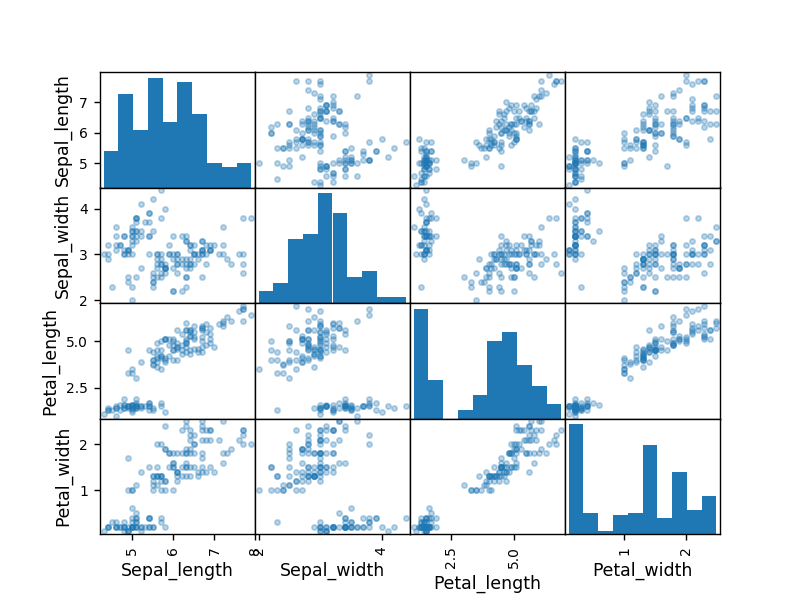

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb91849550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7feb68ec1198>]], dtype=object)

In [3]:
#show trend in iris dataset, with scatterplot and diagonal as a histogram
pd.tools.plotting.scatter_matrix(iris_df,alpha=0.3)

# Finding optimum number of clustors

In [4]:
#Finding the optimum number of clusters.
x = iris_df.iloc[:, [0, 1, 2, 3]].values
y = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    y.append(kmeans.inertia_)
print(y)

[680.82439999999997, 152.36870647733903, 78.940841426146008, 57.317873214285711, 46.561630158730161, 38.930963049671746, 34.190687924796627, 30.063874432733133, 27.879287878787881, 26.048202248044355]


# Prediction model

In [5]:
#creating predict model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# Graphs

<IPython.core.display.Javascript object>


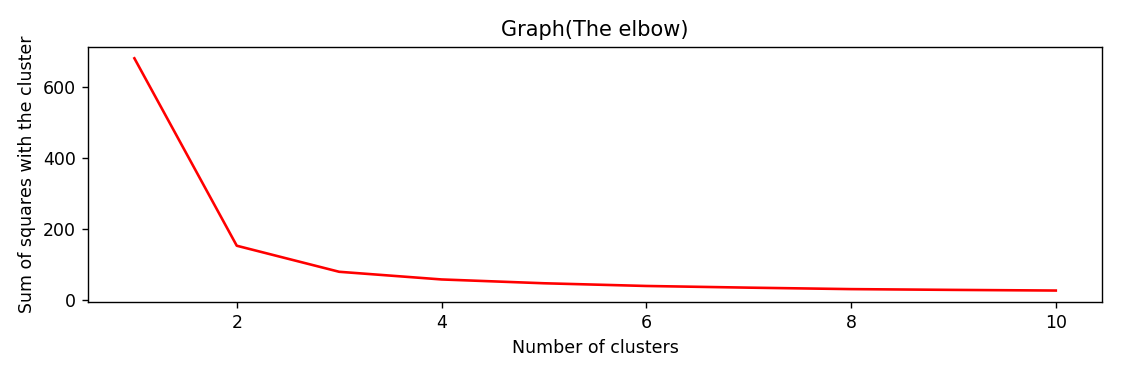

In [6]:
#plot line graph
plt.figure(figsize=(9, 3))
plt.plot(range(1, 11), y, color="red")
plt.title("Graph(The elbow)")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares with the cluster')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


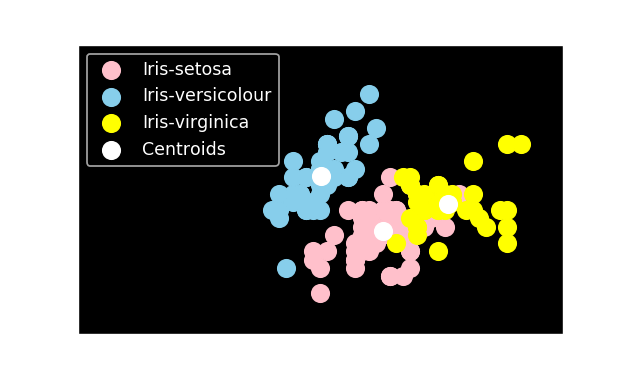

In [7]:
plt.figure(figsize=(5, 3))
plt.style.use('dark_background')
plt.xlim(1.5,8.5)
plt.ylim(1.5,5)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'skyblue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'white', label = 'Centroids')

plt.legend()
plt.show()